In [1]:
import random

import numpy as np

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import matplotlib.pyplot as plt

In [2]:
#Problem parameter
NB_QUEENS = 40

def evalNQueens(individual):
    """Evaluation function for the n-queens problem.
    The problem is to determine a configuration of n queens
    on a nxn chessboard such that no queen can be taken by
    one another. In this version, each queens is assigned
    to one column, and only one queen can be on each line.
    The evaluation function therefore only counts the number
    of conflicts along the diagonals.
    """
    size = len(individual)
    #Count the number of conflicts with other queens.
    #The conflicts can only be diagonal, count on each diagonal line
    left_diagonal = [0] * (2*size-1)
    right_diagonal = [0] * (2*size-1)
    
    #Sum the number of queens on each diagonal:
    for i in range(size):
        left_diagonal[i+individual[i]] += 1
        right_diagonal[size-1-i+individual[i]] += 1
    
    #Count the number of conflicts on each diagonal
    sum_ = 0
    for i in range(2*size-1):
        if left_diagonal[i] > 1:
            sum_ += left_diagonal[i] - 1
        if right_diagonal[i] > 1:
            sum_ += right_diagonal[i] - 1
    return sum_,

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

#Since there is only one queen per line, 
#individual are represented by a permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

#Structure initializers
#An individual is a list that represents the position of each queen.
#Only the line is stored, the column is the index of the number in the list.
toolbox.register("individual", tools.initIterate, creator.Individual, 
                 toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)

In [4]:
def main(seed=0):
    random.seed(seed)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats,
                        halloffame=hof, verbose=True)

    return pop, log, hof

gen	nevals	avg  	std   	min	max
0  	300   	20.69	2.8776	13 	31 
1  	173   	19.3467	2.59997	13 	30 
2  	192   	18.7733	2.77284	12 	28 
3  	177   	18.1267	2.72469	11 	26 
4  	195   	17.9533	2.93675	11 	27 
5  	156   	16.76  	2.75241	11 	25 
6  	163   	16.4633	3.21693	12 	26 
7  	166   	15.77  	3.10651	12 	26 
8  	183   	15.7567	3.38587	10 	26 
9  	181   	14.8733	3.14175	10 	26 
10 	166   	13.58  	2.77313	8  	26 
11 	167   	12.75  	2.6884 	8  	25 
12 	186   	12.6733	2.72641	8  	26 
13 	195   	12.3867	2.95587	8  	23 
14 	190   	12     	2.8856 	8  	25 
15 	185   	11.3467	2.75919	8  	24 
16 	165   	10.5733	2.18738	7  	23 
17 	178   	10.1767	2.3421 	7  	23 
18 	171   	9.87667	2.1342 	7  	21 
19 	168   	9.36667	1.68688	7  	16 
20 	179   	8.86333	1.71988	7  	17 
21 	181   	8.62667	1.46536	6  	16 
22 	157   	8.52667	1.85003	6  	19 
23 	190   	8.18333	1.47977	6  	15 
24 	158   	8.06333	1.90245	6  	19 
25 	169   	7.79333	1.75232	6  	18 
26 	171   	7.67333	1.86546	5  	19 
27 	182   	7.72333	2.22863

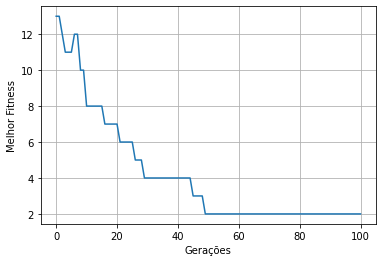

In [5]:
if __name__ == "__main__":
    pop, log, _ = main()
    print(pop)

    gen = log.select('gen')
    best_per_gen = log.select('min')
    
    fig, ax = plt.subplots()
    ax.plot(gen, best_per_gen)
    ax.grid()
    ax.set(xlabel="Gerações", ylabel="Melhor Fitness")
    plt.show()